In [ ]:
!git clone https://github.com/fastai/fastai2
%cd fastai2
!pip install -e ".[dev]"

In [ ]:
!unzip '/content/drive/My Drive/Painting_FastAI_128.zip'

In [3]:
# from utils import *
from fastai2.vision.all import *
from fastai2.vision.widgets import widgets
from ipywidgets import HBox,VBox,widgets,Button,Checkbox,Dropdown,Layout,Box,Output,Label,FileUpload

In [6]:
path = '/content/fastai2/Painting_FastAI'

In [7]:
dls = ImageDataLoaders.from_folder(path, train = 'train', valid='val', 
    item_tfms=CropPad(128, pad_mode='zeros'), bs=32, batch_tfms=Normalize.from_stats(*imagenet_stats))

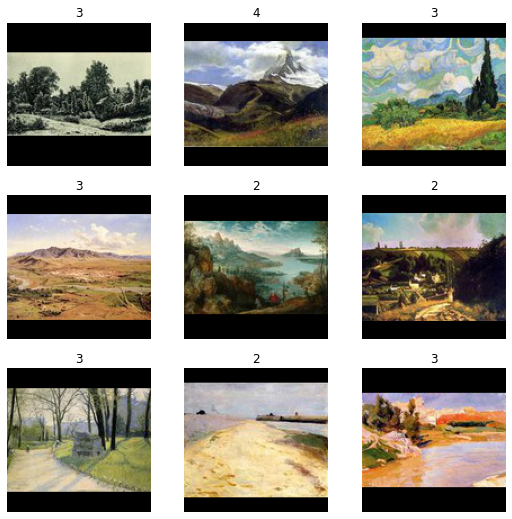

In [8]:
dls.show_batch()

In [9]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.691376,1.308525,0.423952,00:19


epoch,train_loss,valid_loss,accuracy,time
0,1.331374,1.168599,0.494611,00:25
1,1.191809,1.115050,0.523353,00:25
2,1.072517,1.057287,0.534132,00:25
3,0.887681,1.060632,0.543713,00:25
4,0.677263,1.078426,0.567665,00:25


SuggestedLRs(lr_min=3.0199516913853586e-06, lr_steep=9.12010818865383e-07)

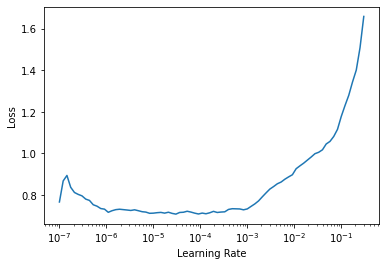

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.711519,1.072870,0.451497,00:57
1,0.700390,1.074164,0.452695,00:56
2,0.678399,1.075730,0.452695,00:56
3,0.702332,1.076765,0.451497,00:56
4,0.678977,1.074694,0.446707,00:56


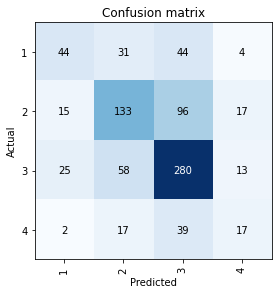

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.show_results()

In [11]:
learn.export("export.pkl")
path = learn.path
path.ls(file_exts='.pkl')

(#1) [Path('/content/fastai2/Painting_FastAI/export.pkl')]

In [12]:
learn_inf = load_learner(path/'export.pkl')
# learn_inf.predict('/content/fastai2/testPoB.png')
learn_inf.dls.vocab

(#4) ['1','2','3','4']

In [25]:
btn_upload = widgets.FileUpload()
btn_upload = SimpleNamespace(data = ['/content/drive/My Drive/Test Image/testPoB.png'])

In [26]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [27]:
pred,pred_idx,probs = learn_inf.predict(img)

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: 2; Probability: 0.5310')

In [28]:
btn_run = widgets.Button(description='Classify')

In [29]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [30]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [31]:
VBox([widgets.Label('Select your image!'), btn_upload, btn_run, out_pl, lbl_pred])